# Covid data exploration



In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2, f_regression
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [159]:
dataset = pd.read_csv('data_covid.csv', index_col=0)
dataset.shape

(15, 69)

In [160]:
dataset.head()

,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_novos,recuperados,obitos,...,Temperature,Precipitation,Wind_Speed,Wind_Direction,Visibility,Cloud_Cover,Relative_Humidity,Rain,Clear,Partially_cloudy
Data,,,,,,,,,,,,,,,,,,,,,
2020-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,14.331034,0.438276,16.341379,197.035862,10.162069,5.268966,78.538276,0.344828,0.655172,0.00000
2020-03-31,651.0,127.0,222.0,5.0,21.0,7.0,2.0,7443,0.0,20.0,...,14.606452,0.862903,23.151613,214.938387,10.696774,3.522581,71.123548,0.322581,0.677419,0.00000
2020-04-30,-459.0,-78.0,-102.0,-1.0,-20.0,-5.0,-2.0,17249,49.0,-4.0,...,15.156667,5.609000,22.270000,236.368667,9.930000,3.536667,80.986000,0.566667,0.433333,0.00000
2020-05-31,-171.0,-44.0,148.0,-4.0,2.0,-2.0,0.0,7808,174.0,-2.0,...,19.729032,2.637097,21.319355,238.006774,10.387097,8.777419,71.619032,0.258065,0.741935,0.16129
2020-06-30,-1.0,5.0,-50.0,7.0,0.0,0.0,1.0,9671,77.0,-6.0,...,20.223333,0.115333,21.513333,304.571667,11.213333,6.103333,69.227000,0.133333,0.866667,0.00000


## pearson correlation

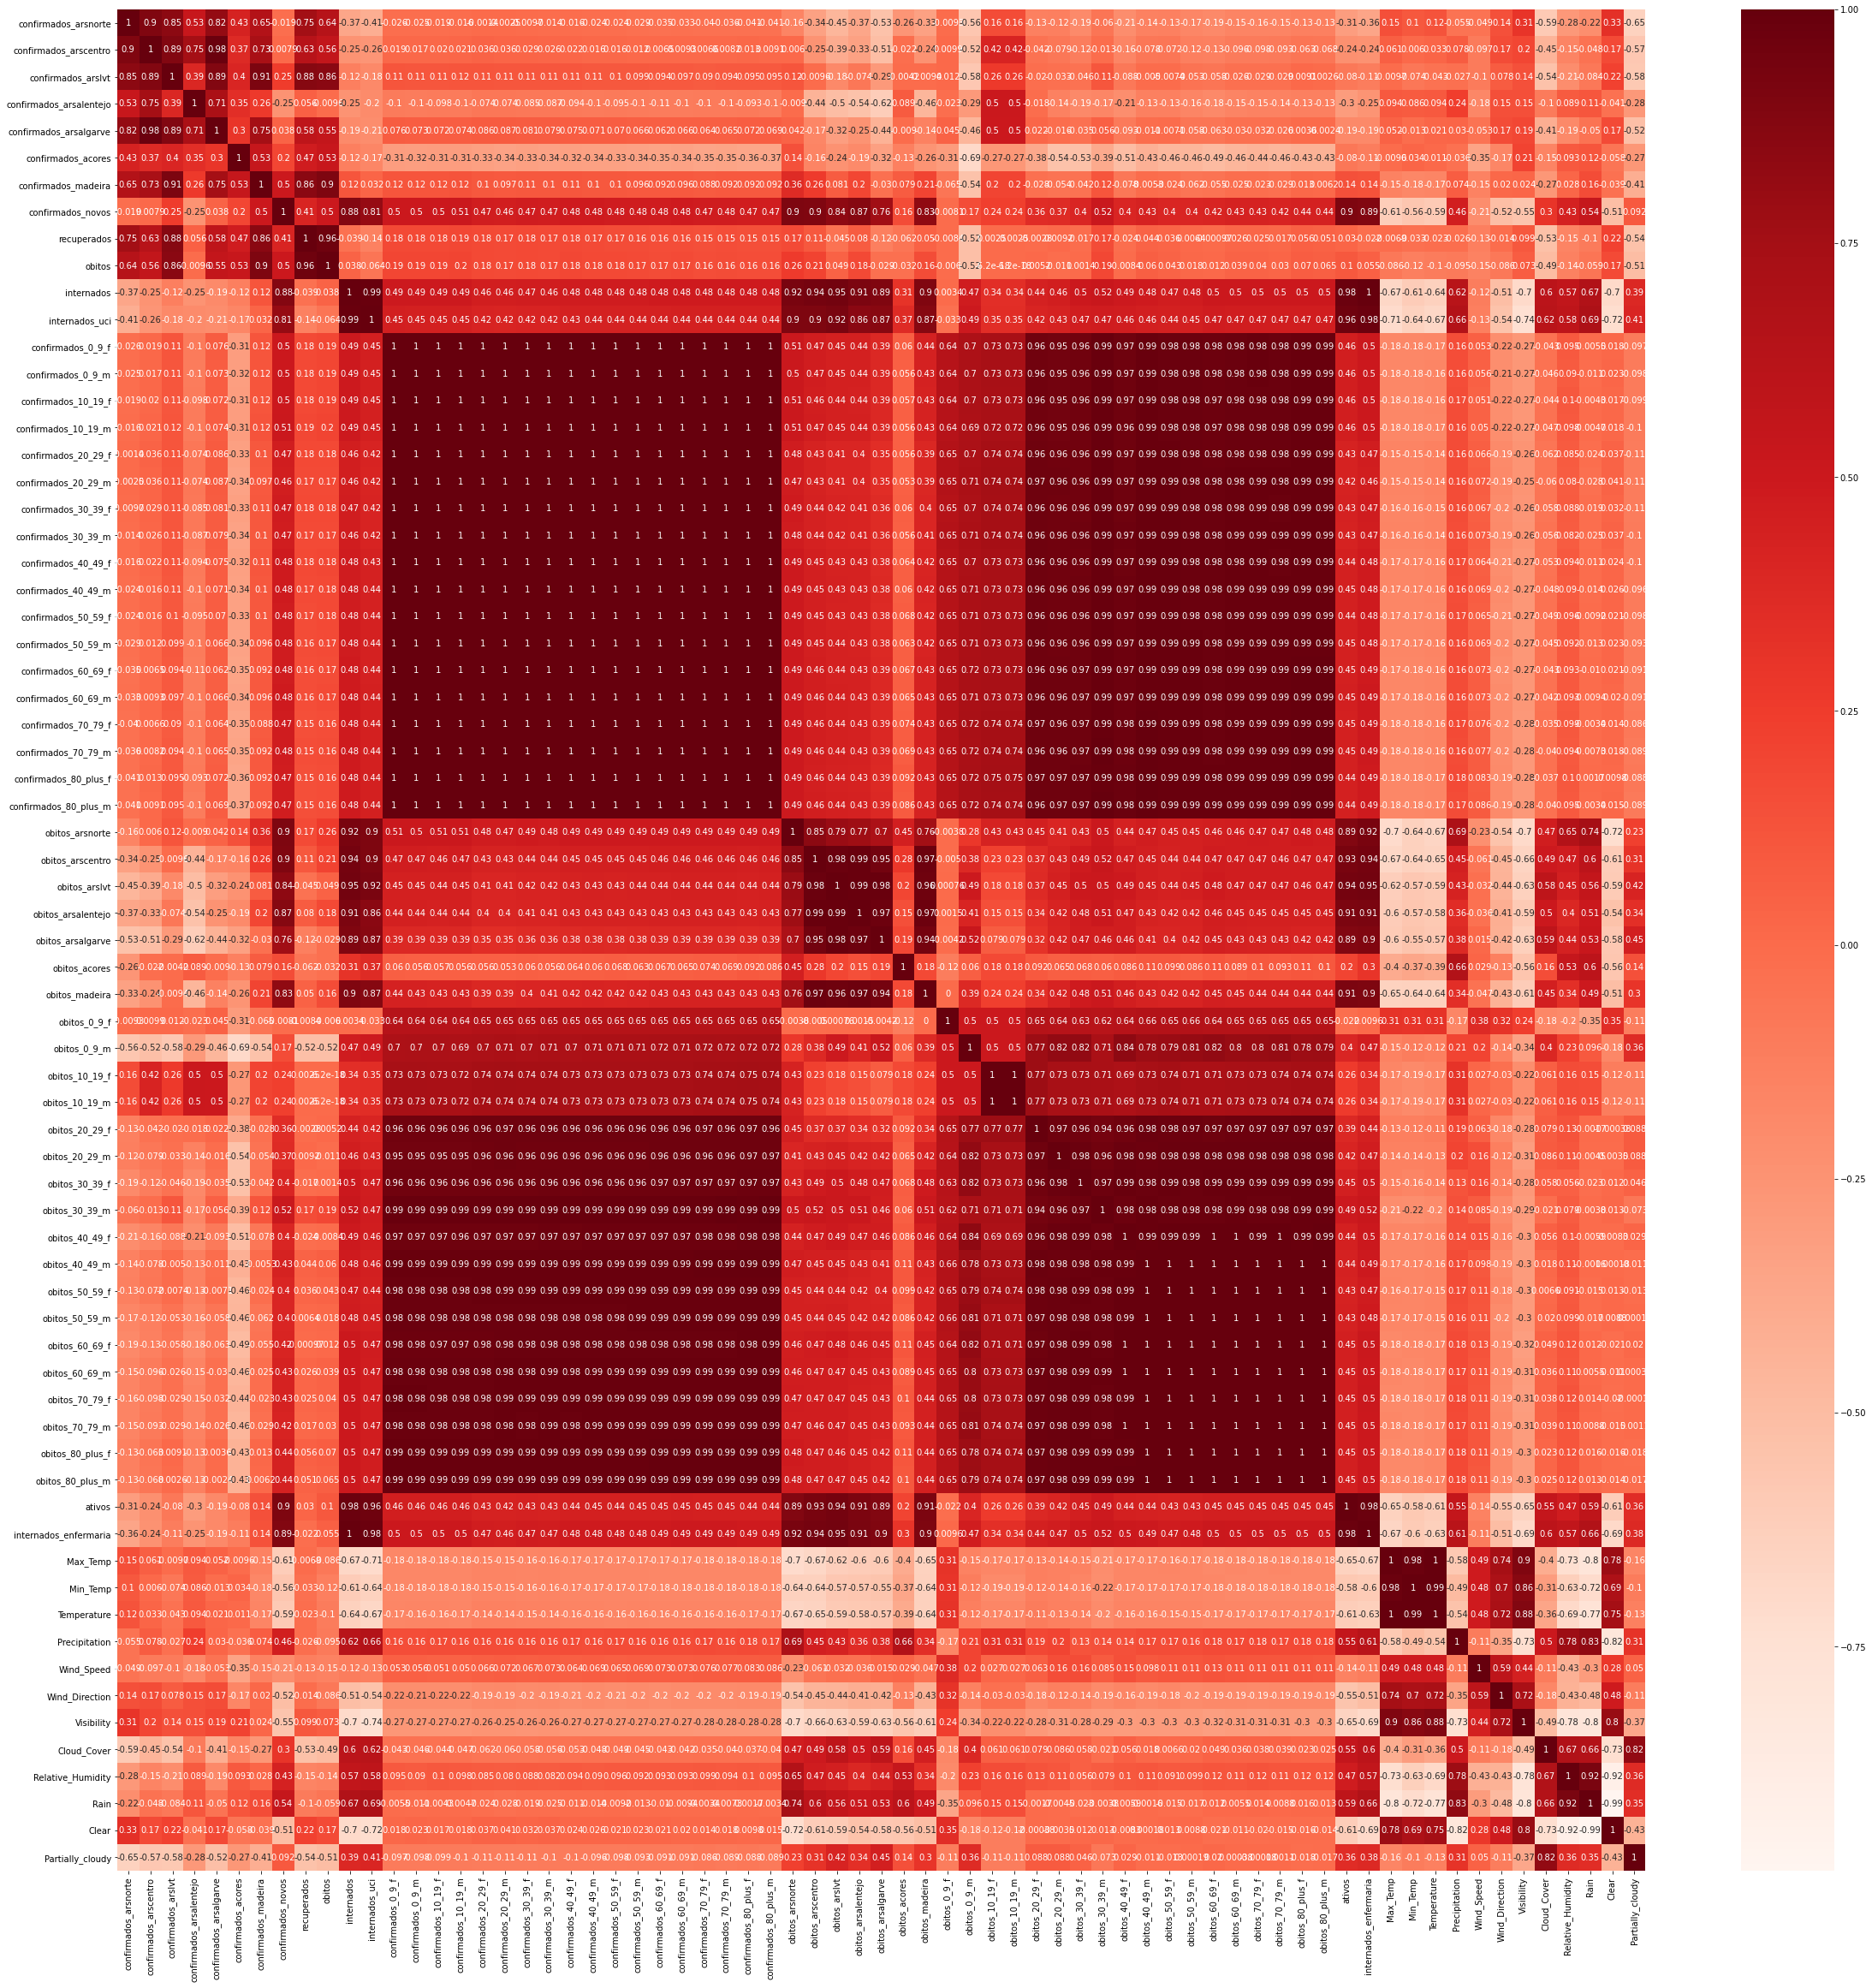

Data
2020-03-31     20.0
2020-04-30      4.0
2020-05-31      2.0
2020-06-30      6.0
2020-08-31      5.0
2020-09-30      5.0
2020-10-31     31.0
2020-11-30     39.0
2020-12-31      2.0
2021-01-31    227.0
2021-02-28    262.0
2021-03-31     38.0
2021-04-30      2.0
Name: obitos, dtype: float64

In [161]:
#Using Pearson Correlation
plt.figure(figsize=(40,40))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Correlation with output variable
cor_target = abs(dataset['obitos'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Como entendemos que temos muitas features, após observar a matriz de correlações de pearson, fizemos um filtro preliminas de features, eliminando features cuja correlação fosse menor que  +/-0.5.

In [162]:
c = set()
df_aux = dataset
for i in range(len(cor.columns)):
    if cor.columns[i] == 'obitos':
        for j in range(len(cor.columns)):
            if cor.columns[j] != 'obitos':
                x = abs(cor.iloc[i, j])
                if x < 0.25 and (cor.columns[j] not in c):
                    colname = cor.columns[j]
                    c.add(colname)
                    df_aux = df_aux.drop(columns = cor.columns[j])

c
#dataset = dataset.drop(columns=['Max_Temp', 'Min_Temp', 'Wind_Speed','Partially_cloudy'])

{'Clear',
 'Max_Temp',
 'Min_Temp',
 'Precipitation',
 'Rain',
 'Relative_Humidity',
 'Temperature',
 'Visibility',
 'Wind_Direction',
 'Wind_Speed',
 'ativos',
 'confirmados_0_9_f',
 'confirmados_0_9_m',
 'confirmados_10_19_f',
 'confirmados_10_19_m',
 'confirmados_20_29_f',
 'confirmados_20_29_m',
 'confirmados_30_39_f',
 'confirmados_30_39_m',
 'confirmados_40_49_f',
 'confirmados_40_49_m',
 'confirmados_50_59_f',
 'confirmados_50_59_m',
 'confirmados_60_69_f',
 'confirmados_60_69_m',
 'confirmados_70_79_f',
 'confirmados_70_79_m',
 'confirmados_80_plus_f',
 'confirmados_80_plus_m',
 'confirmados_arsalentejo',
 'internados',
 'internados_enfermaria',
 'internados_uci',
 'obitos_0_9_f',
 'obitos_10_19_f',
 'obitos_10_19_m',
 'obitos_20_29_f',
 'obitos_20_29_m',
 'obitos_30_39_f',
 'obitos_30_39_m',
 'obitos_40_49_f',
 'obitos_40_49_m',
 'obitos_50_59_f',
 'obitos_50_59_m',
 'obitos_60_69_f',
 'obitos_60_69_m',
 'obitos_70_79_f',
 'obitos_70_79_m',
 'obitos_80_plus_f',
 'obitos_80_plu

## Feature selection com SelectKBest

In [163]:
df_data = abs(df_aux.drop(columns='obitos'))
df_label = df_aux['obitos']

In [164]:
# Feature extraction
test = SelectKBest(score_func=chi2)
fit = test.fit_transform(df_data, df_label)

In [165]:
fit[:19]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.26896552e+00],
       [6.51000000e+02, 1.27000000e+02, 2.22000000e+02, 2.10000000e+01,
        7.00000000e+00, 2.00000000e+00, 7.44300000e+03, 0.00000000e+00,
        8.30000000e+01, 3.52258065e+00],
       [4.59000000e+02, 7.80000000e+01, 1.02000000e+02, 2.00000000e+01,
        5.00000000e+00, 2.00000000e+00, 1.72490000e+04, 4.90000000e+01,
        4.83000000e+02, 3.53666667e+00],
       [1.71000000e+02, 4.40000000e+01, 1.48000000e+02, 2.00000000e+00,
        2.00000000e+00, 0.00000000e+00, 7.80800000e+03, 1.74000000e+02,
        2.18000000e+02, 8.77741935e+00],
       [1.00000000e+00, 5.00000000e+00, 5.00000000e+01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 9.67100000e+03, 7.70000000e+01,
        3.40000000e+01, 6.10333333e+00],
       [2.90000000e+01, 6.00000000e+00, 9.00000000e+01, 2.00000000e+00,
   

In [166]:
df_data[:19]

,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_novos,recuperados,obitos_arsnorte,obitos_0_9_m,Cloud_Cover,Partially_cloudy
Data,,,,,,,,,,,,
2020-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,5.268966,0.000000
2020-03-31,651.0,127.0,222.0,21.0,7.0,2.0,7443,0.0,83.0,0.0,3.522581,0.000000
2020-04-30,459.0,78.0,102.0,20.0,5.0,2.0,17249,49.0,483.0,0.0,3.536667,0.000000
2020-05-31,171.0,44.0,148.0,2.0,2.0,0.0,7808,174.0,218.0,0.0,8.777419,0.161290
2020-06-30,1.0,5.0,50.0,0.0,0.0,1.0,9671,77.0,34.0,0.0,6.103333,0.000000
2020-07-31,29.0,6.0,90.0,2.0,1.0,1.0,8901,43.0,10.0,0.0,1.958065,0.000000
2020-08-31,34.0,3.0,9.0,2.0,2.0,0.0,6940,267.0,21.0,0.0,5.164516,0.032258
2020-09-30,211.0,75.0,261.0,34.0,2.0,2.0,17530,261.0,37.0,0.0,5.030000,0.000000
2020-10-31,1606.0,470.0,1008.0,39.0,2.0,3.0,65737,2494.0,225.0,0.0,4.638710,0.000000


## Feature selection of Lag Variables com Random Forest Regressor

We can also use feature selection to automatically identify and select those input features that are most predictive.

A popular method for feature selection is called Recursive Feature Selection (RFE).

RFE works by creating predictive models, weighting features, and pruning those with the smallest weights, then repeating the process until a desired number of features are left.

The code below uses RFE with a random forest predictive model and sets the desired number of input features to 10.

(A bar graph is also created showing the feature selection rank (smaller is better) for each input feature.)

Selected Features:
confirmados_arslvt
confirmados_arsalentejo
confirmados_madeira
recuperados
obitos
internados
obitos_40_49_m
obitos_50_59_f
obitos_80_plus_m
Wind_Direction


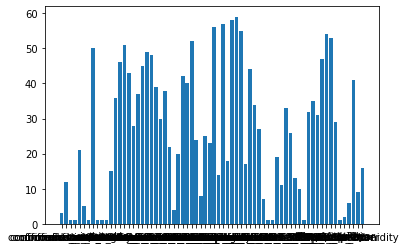

In [167]:
df_data = dataset.drop(columns='obitos')
df_label = dataset['obitos']
# separate into input and output variables
array = dataset.values
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=10)
fit = rfe.fit(df_data, df_label)
# report selected features
print('Selected Features:')
names = dataset.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = dataset.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()

## Escolha final de features:
Após fazer estes dois métodos de selecção de features, e visto que o seus resultados fazem bastante overlap, decidimos escolher as features resultantes iguais, bem como manter as diferentes.

confirmados_arsnorte ,confirmados_arscentro, confirmados_arslvt, confirmados_arsalgarve, confirmados_acores, confirmados_madeira, confirmados_novos, recuperados, obitos_arsnorte, obitos_0_9_m, Cloud_Cover, Partially_cloudy

confirmados_arslvt, confirmados_madeira, recuperados, internados, obitos_arsnorte, obitos_arscentro, obitos_arsalentejo, obitos_80_plus_m, Wind_Direction, Visibility

In [177]:
df = dataset.drop(dataset.columns.difference(['confirmados_arsnorte' ,'confirmados_arscentro', 'confirmados_arslvt', 'confirmados_arsalgarve', 'confirmados_acores', 'confirmados_madeira', 'confirmados_novos', 'recuperados', 'internados', 'obitos_arsnorte', 'obitos_arscentro', 'obitos_arsalentejo', 'obitos_80_plus_m', 'Wind_Direction', 'Visibility', 'obitos_0_9_m', 'Cloud_Cover', 'Partially_cloudy']), axis =1)

In [181]:
df.head()

,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_novos,recuperados,internados,obitos_arsnorte,obitos_arscentro,obitos_arsalentejo,obitos_0_9_m,obitos_80_plus_m,Wind_Direction,Visibility,Cloud_Cover,Partially_cloudy
Data,,,,,,,,,,,,,,,,,,
2020-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.035862,10.162069,5.268966,0.00000
2020-03-31,651.0,127.0,222.0,21.0,7.0,2.0,7443,0.0,4938.0,83.0,40.0,0.0,0.0,50.0,214.938387,10.696774,3.522581,0.00000
2020-04-30,-459.0,-78.0,-102.0,-20.0,-5.0,-2.0,17249,49.0,33488.0,483.0,158.0,1.0,0.0,238.0,236.368667,9.930000,3.536667,0.00000
2020-05-31,-171.0,-44.0,148.0,2.0,-2.0,0.0,7808,174.0,20984.0,218.0,40.0,0.0,0.0,119.0,238.006774,10.387097,8.777419,0.16129
2020-06-30,-1.0,5.0,-50.0,0.0,0.0,1.0,9671,77.0,12911.0,34.0,10.0,6.0,0.0,51.0,304.571667,11.213333,6.103333,0.00000


In [179]:
df.columns

Index(['confirmados_arsnorte', 'confirmados_arscentro', 'confirmados_arslvt',
       'confirmados_arsalgarve', 'confirmados_acores', 'confirmados_madeira',
       'confirmados_novos', 'recuperados', 'internados', 'obitos_arsnorte',
       'obitos_arscentro', 'obitos_arsalentejo', 'obitos_0_9_m',
       'obitos_80_plus_m', 'Wind_Direction', 'Visibility', 'Cloud_Cover',
       'Partially_cloudy'],
      dtype='object')